# Visualizing data using the plot_slice function

`plot_slice` is a function that is capable of plotting 2-D datasets on axes which need not be orthogonal. This was designed originally for plotting X-ray scattering datasets much in the way that the [NeXpy](https://github.com/nexpy) package does.


## Importing `plot_slice`

In [3]:
from nxs_analysis_tools import plot_slice, load_transform, load_data
from nxs_analysis_tools.datasets import cubic, hexagonal, vacanciesfft
from nexusformat.nexus import NXdata, NXfield
import numpy as np

# Load example datasets and obtain their cache directories
sample_dir_cubic = cubic(temperatures=[300])
sample_dir_hexagonal = hexagonal(temperatures=[300])
data_path_fft = vacanciesfft()

## Import data

In [4]:
data_cubic = load_transform(sample_dir_cubic + '/cubic_300.nxs')
data_hex = load_transform(sample_dir_hexagonal + '/hexagonal_300.nxs')

data:NXdata
  @axes = ['Qh', 'Qk', 'Ql']
  @signal = 'counts'
  Qh = float64(100)
  Qk = float64(150)
  Ql = float64(200)
  counts = float64(100x150x200)
data:NXdata
  @axes = ['Qh', 'Qk', 'Ql']
  @signal = 'counts'
  Qh = float64(100)
  Qk = float64(150)
  Ql = float64(200)
  counts = float64(100x150x200)


## Basic plotting

Plot slice accepts an `NXdata` object which holds 2-D data. Thus, if working with a 3D scattering dataset, you must index one of the axes or provide the optional `sum_axis` parameter which allows for integration along one of the axes before plotting.

Here we plot the L=0 plane.

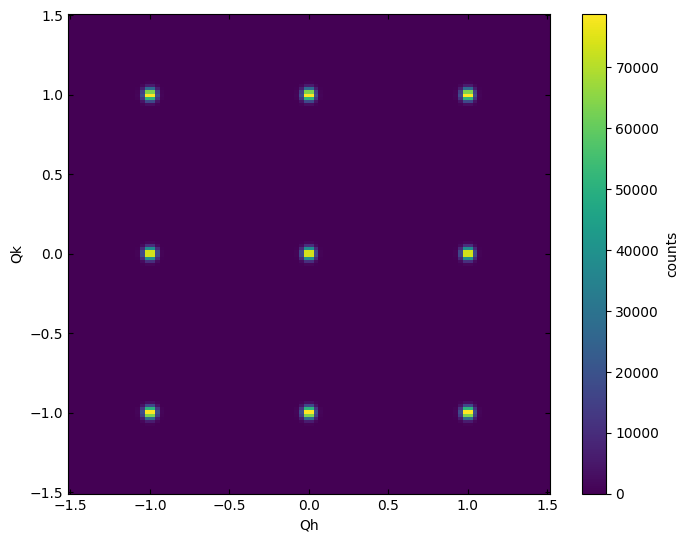

In [5]:
plot_slice(data_cubic[:,:,0.0])

In the case that we want to integrate a small width out of this plane, we can use `sum_axis=2` (`0`=_H_, `1`=_K_, `2`=_L_) and provide a 3D dataset which has a small width along the _L_ direction.

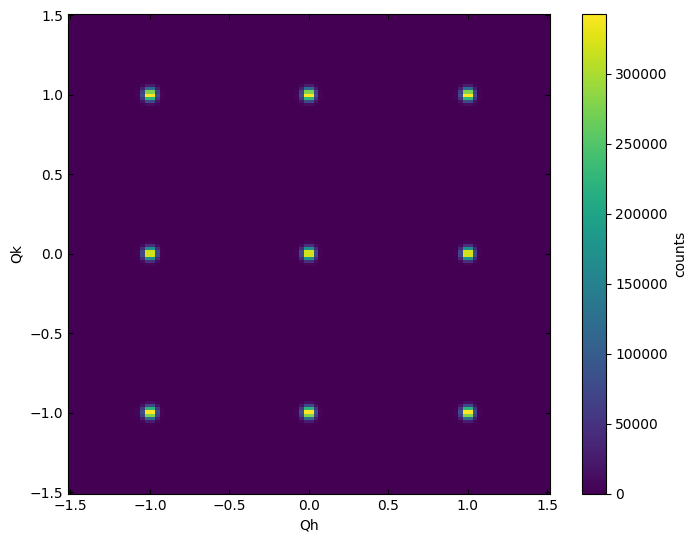

In [6]:
plot_slice(data_cubic[:,:,-0.1:0.1], sum_axis=2)

## Transposing the X and Y axes

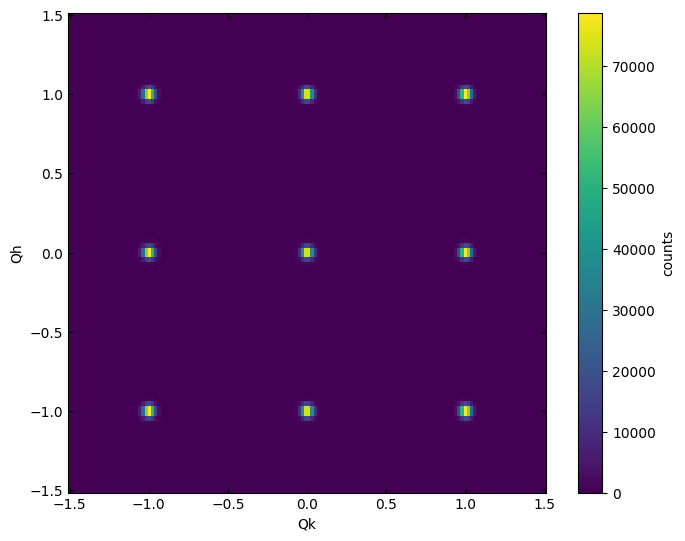

In [7]:
plot_slice(data_cubic[:,:,0.0], transpose=True)

## Plotting on non-orthogonal axes

When working in a non-orthorhombic cell, it may be necessary to specify the skew angle between the axes of interest. Here, we consider a hexagonal crystal structure, for which H and K are 60$^\circ$ apart.

If we plot the data using no additional arugments, we see that the Bragg reflections are skewed.

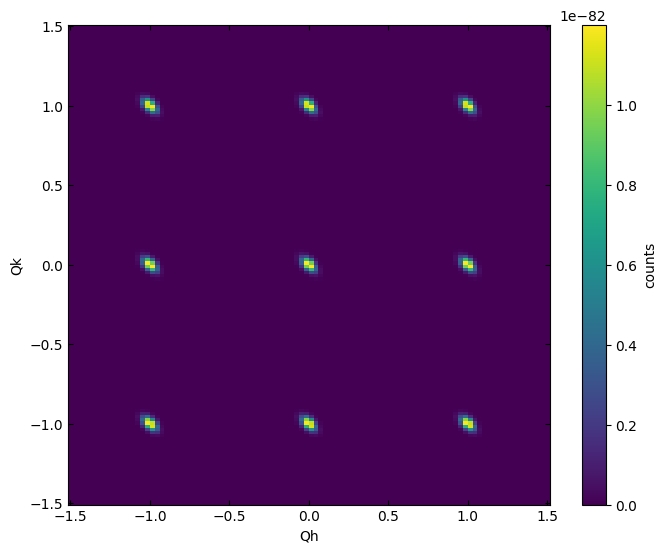

In [8]:
plot_slice(data_hex[:,:,0])

Use the `skew_angle` parameter to correct the angle between the plotted X and Y axes.

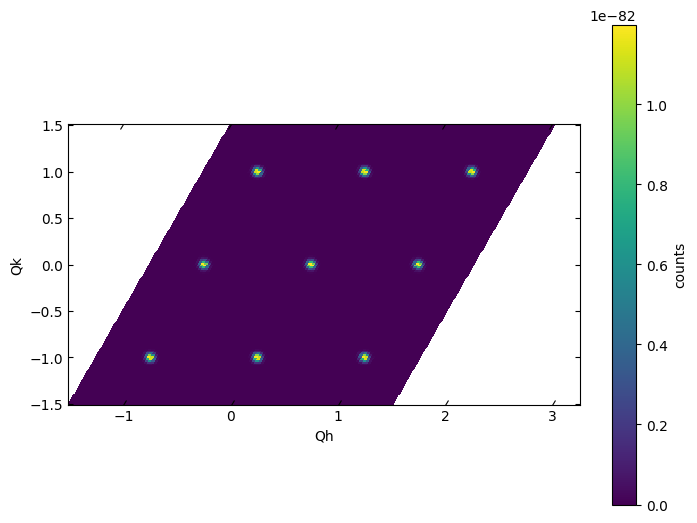

In [9]:
plot_slice(data_hex[:,:,0], skew_angle=60)

### Adjusting axis limits

Note that the x-axis limits are interpreted in a way that displays the full area covered by the specified x and y limits. Thus, when working with a skewed dataset, the actual tick marks on the x-axis will extend longer than the specified limits.

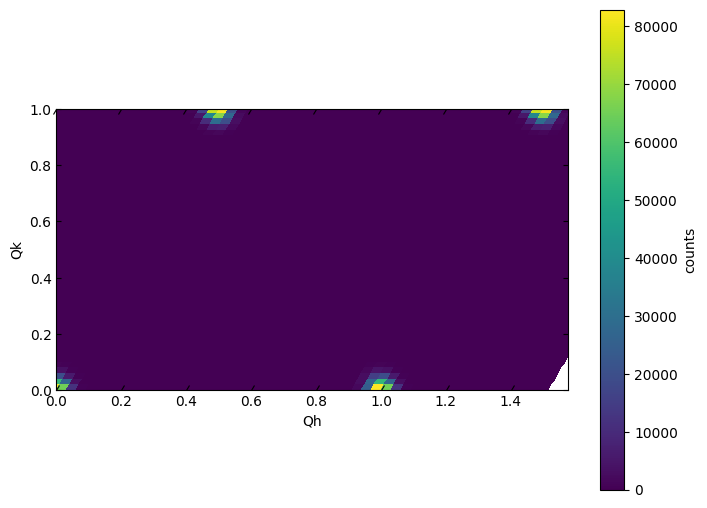

In [10]:
plot_slice(data_hex[:,:,0.0], skew_angle=60, xlim=(0,1), ylim=(0,1))

## Adjusting color mapping

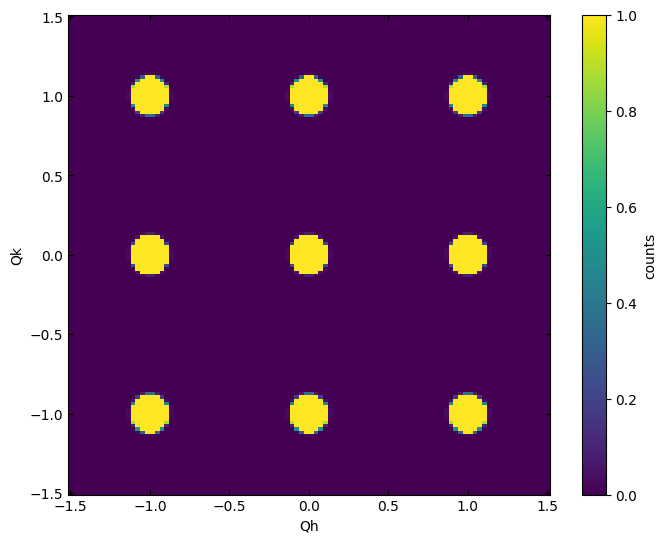

In [11]:
plot_slice(data_cubic[:,:,0.0], vmin=0,vmax=1)

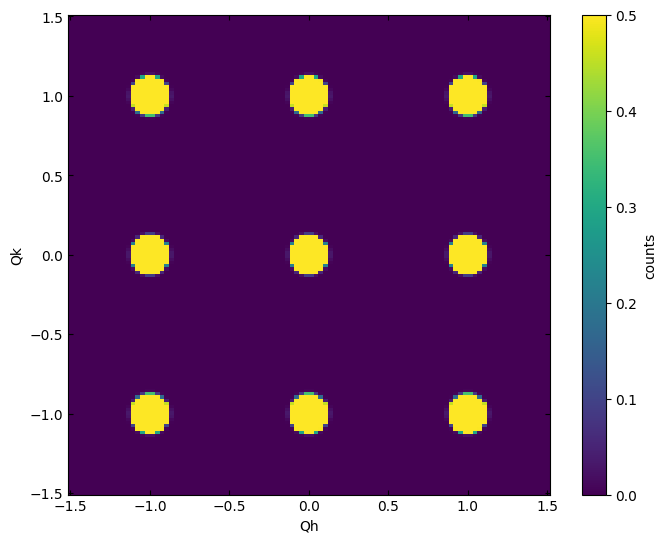

In [12]:
plot_slice(data_cubic[:,:,0.0], vmin=0,vmax=0.5)

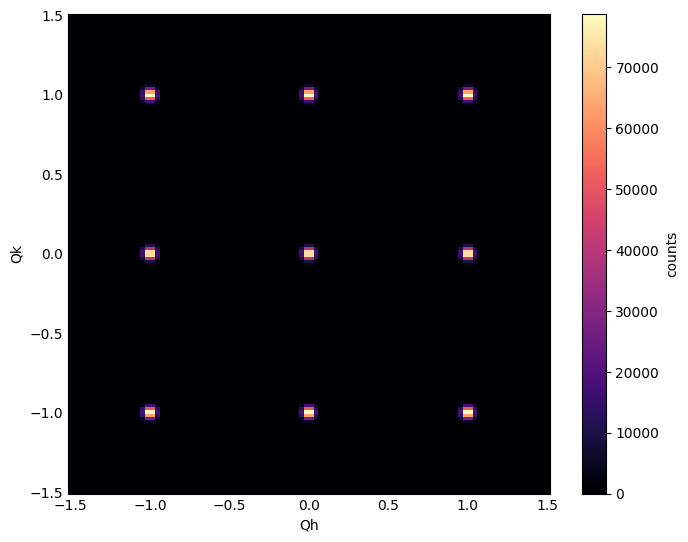

In [13]:
plot_slice(data_cubic[:,:,0.0], cmap='magma')

## Using logscale

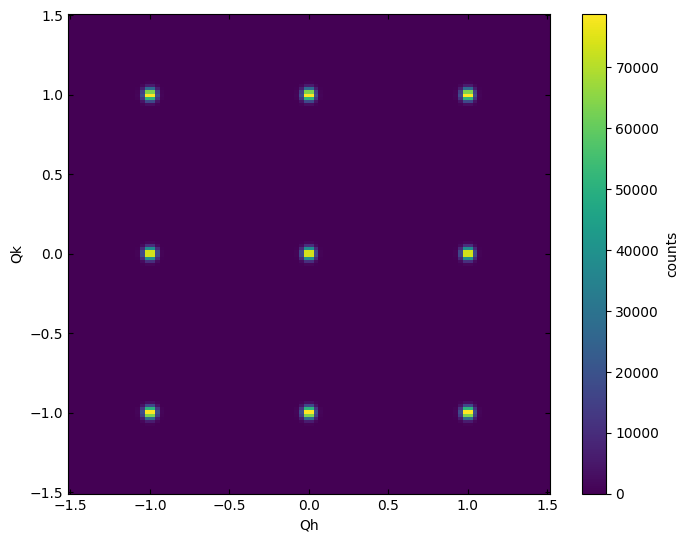

In [14]:
plot_slice(data_cubic[:,:,0.0], logscale=False)

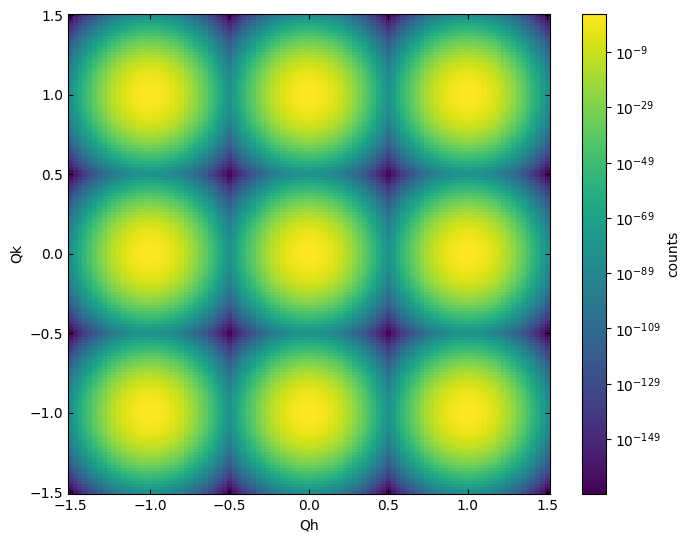

In [15]:
plot_slice(data_cubic[:,:,0.0], logscale=True)

## Using symlogscale

First, let's load an example dataset with both positive and negative values

In [4]:
fft = load_data(data_path_fft)

data:NXdata
  @axes = ['x', 'y', 'z']
  @signal = 'dPDF'
  dPDF = float64(85x85x85)
  title = 'data/data'
  x = float64(85)
  y = float64(85)
  z = float64(85)


Without the `symlogscale`, the data is plotted on a linear colormap. Both a `vmin` and `vmax` can be provided for the limits of the colormap.

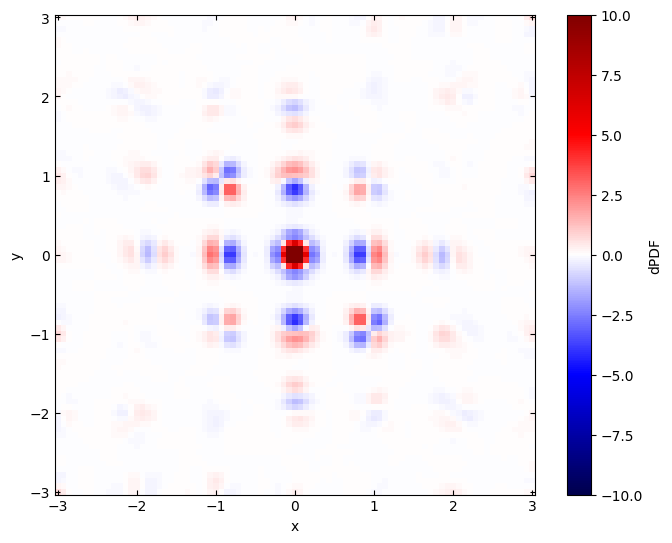

In [7]:
plot_slice(fft[:,:,0.0], cmap='seismic', symlogscale=False, vmin=-10, vmax=10)

With `symlogscale` enabled, only the `vmax` parameter is used the colorbar is symmetric about zero.

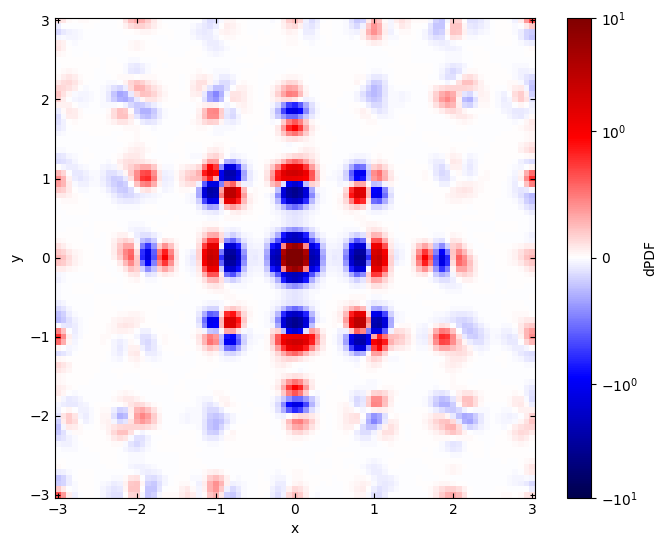

In [8]:
plot_slice(fft[:,:,0.0], cmap='seismic', symlogscale=True, vmax=10)